## Вариант 13

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Метод наименьших квадратов.

Для той же функции и отрезка [𝑎, 𝑏] написать программу, вычисляющую приближённо аппроксимацию по
набору точек с помощью метода наименьших квадратов с целевым многочленом
степени K.

Построим график заданной функции на участке от 3 до 10:

<Figure size 720x432 with 0 Axes>

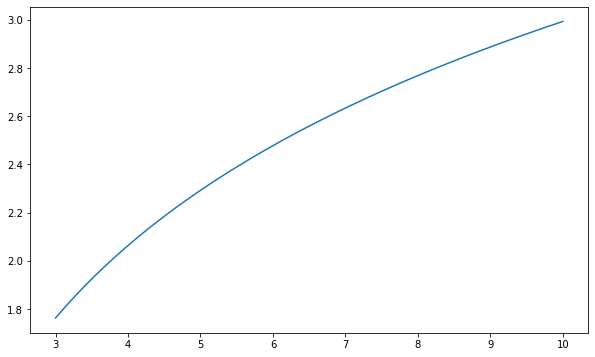

In [3]:
plt.figure(figsize=(10,6))
x = np.linspace(3, 10, 100)
y = np.log(x+(x*x-1)**0.5)

plt.figure(figsize=(10,6))
plt.plot(x, y);

Массив опорных точек по которому нужно восстановить функцию:

In [4]:
X = np.array([3, 4, 5, 6, 7, 8, 9, 10])

x = np.linspace(3, 10, 100)
Y = np.log(X+(X*X-1)**0.5)

In [5]:
data = pd.DataFrame(columns = ['X', 'Y'],
            data = np.array([X, Y]).T)
# выведем несколько точек
data.head(5)

,X,Y
0,3.0,1.762747
1,4.0,2.063437
2,5.0,2.292432
3,6.0,2.477889
4,7.0,2.633916


In [6]:
class MNK:
    def __init__(self, fit_intercept = True, up_size = False):
        self.fit_intercept = fit_intercept
        self.up_size = up_size 

    def seek_coef(self, X, y):        
        if self.fit_intercept:
            if self.up_size == True:
                X = np.hstack( (np.ones((X.shape[0], 1)), X.to_numpy().reshape((X.shape[0], 1))) )
            else:
                X = np.hstack( (np.ones((X.shape[0], 1)), X))

        self.a = np.linalg.inv(X.T @ X) @ X.T @ y
        return self
        
    def predict(self, X):
        if self.fit_intercept:
            if self.up_size == True:
                X = np.hstack( (np.ones((X.shape[0], 1)), X.to_numpy().reshape((X.shape[0], 1))) )
            else:
                X = np.hstack( (np.ones((X.shape[0], 1)), X))
        y_pred = X @ self.a
        return y_pred
    
    def get_coef(self):
        return self.a

#### Линейная функция

Коэффициенты при линейной функции:

In [7]:
mnk = MNK(up_size = True)
coef = mnk.seek_coef(data.X, data.Y).get_coef()
print('a0 = %.4f' % coef[0])
print('a1 = %.4f' % coef[1])

a0 = 1.3771
a1 = 0.1704


Построим график исходной функции и линейной функции, полученной МНК:

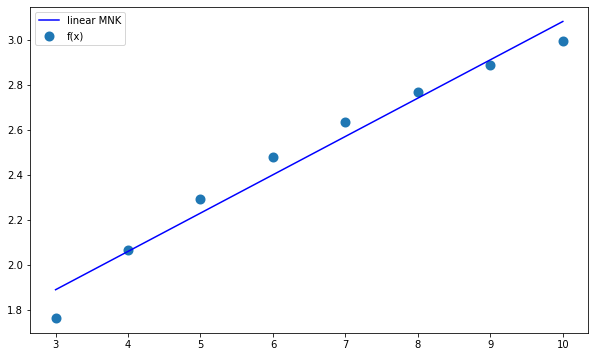

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data.X, data.Y, label = 'f(x)', linewidths = 4)
plt.plot(X, mnk.predict(data.X), color = 'b', label = 'linear MNK')
plt.legend()
plt.show()

Посмотрим на значения линейной функции, полученной МНК, в точках и на невяки линейной функции:

In [9]:
data['Linear MNK'] = mnk.predict(data.X)
data['residuals of linear'] = [(Y[i] - value)**2 for i, value in enumerate(mnk.predict(data.X))]

In [11]:
data

,X,Y,Linear MNK,residuals of linear
0,3.0,1.762747,1.888396,0.015788
1,4.0,2.063437,2.058839,0.000021
2,5.0,2.292432,2.229282,0.003988
3,6.0,2.477889,2.399725,0.006110
4,7.0,2.633916,2.570168,0.004064
5,8.0,2.768659,2.740611,0.000787
6,9.0,2.887271,2.911054,0.000566
7,10.0,2.993223,3.081497,0.007792


#### Квадратичная функция

In [12]:
data['X^2'] = list(map(lambda x: x**2, data.X))
mnk = MNK()
coef = mnk.seek_coef(data[['X', 'X^2']].to_numpy(), data.Y).get_coef()
print('a0 = %.4f' % coef[0])
print('a1 = %.4f' % coef[1])
print('a2 = %.4f' % coef[2])

a0 = 0.8265
a1 = 0.3639
a2 = -0.0149


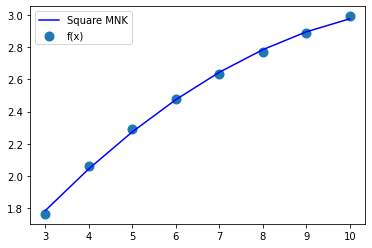

In [13]:
plt.scatter(data.X, data.Y, label = 'f(x)', linewidths = 4)
plt.plot(X, mnk.predict(data[['X', 'X^2']].to_numpy()), color = 'b', label = 'Square MNK')
plt.legend()
plt.show()

In [14]:
data['Square MNK'] =  mnk.predict(data[['X', 'X^2']].to_numpy())
data['residuals of square'] = [(Y[i] - value)**2 for i, value in enumerate(data['Square MNK'])]

In [15]:
data

,X,Y,Linear MNK,residuals of linear,X^2,Square MNK,residuals of square
0,3.0,1.762747,1.888396,0.015788,9.0,1.784238,0.000462
1,4.0,2.063437,2.058839,0.000021,16.0,2.043960,0.000379
2,5.0,2.292432,2.229282,0.003988,25.0,2.273921,0.000343
3,6.0,2.477889,2.399725,0.006110,36.0,2.474124,0.000014
4,7.0,2.633916,2.570168,0.004064,49.0,2.644567,0.000113
5,8.0,2.768659,2.740611,0.000787,64.0,2.785250,0.000275
6,9.0,2.887271,2.911054,0.000566,81.0,2.896174,0.000079
7,10.0,2.993223,3.081497,0.007792,100.0,2.977339,0.000252


#### Кубическая функция

In [16]:
data['X^3'] = list(map(lambda x: x**3, data.X))
mnk = MNK()
coef = mnk.seek_coef(data[['X', 'X^2', 'X^3']].to_numpy(), data.Y).get_coef()
print('a0 = %.4f' % coef[0])
print('a1 = %.4f' % coef[1])
print('a2 = %.4f' % coef[2])
print('a3 = %.4f' % coef[3])

a0 = 0.4514
a1 = 0.5694
a2 = -0.0490
a3 = 0.0017


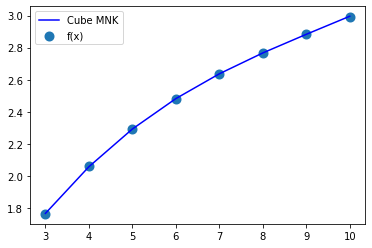

In [17]:
plt.scatter(data.X, data.Y, label = 'f(x)', linewidths = 4)
plt.plot(X, mnk.predict(data[['X', 'X^2', 'X^3']].to_numpy()), color = 'b', label = 'Cube MNK')
plt.legend()
plt.show()

In [18]:
data['Cube MNK'] =  mnk.predict(data[['X', 'X^2', 'X^3']].to_numpy())
data['residuals of cube'] = [(Y[i] - value)**2 for i, value in enumerate(data['Cube MNK'])]

In [19]:
data

,X,Y,Linear MNK,residuals of linear,X^2,Square MNK,residuals of square,X^3,Cube MNK,residuals of cube
0,3.0,1.762747,1.888396,0.015788,9.0,1.784238,0.000462,27.0,1.765877,9.794134e-06
1,4.0,2.063437,2.058839,0.000021,16.0,2.043960,0.000379,64.0,2.057075,4.047869e-05
2,5.0,2.292432,2.229282,0.003988,25.0,2.273921,0.000343,125.0,2.292283,2.215000e-08
3,6.0,2.477889,2.399725,0.006110,36.0,2.474124,0.000014,216.0,2.481993,1.684590e-05
4,7.0,2.633916,2.570168,0.004064,49.0,2.644567,0.000113,343.0,2.636698,7.739423e-06
5,8.0,2.768659,2.740611,0.000787,64.0,2.785250,0.000275,512.0,2.766889,3.134081e-06
6,9.0,2.887271,2.911054,0.000566,81.0,2.896174,0.000079,729.0,2.883059,1.773946e-05
7,10.0,2.993223,3.081497,0.007792,100.0,2.977339,0.000252,1000.0,2.995700,6.137301e-06


Сумма квадратов невязок для каждого способа:

In [22]:
pd.DataFrame(columns = ['Линейная функция', 'квадратичная функция', 'кубическая функция'], 
             index = ['residuals'], 
             data = np.array([data['residuals of linear'].sum(),
                              data['residuals of square'].sum(),
                              data['residuals of cube'].sum()]).reshape((1, 3)))

,Линейная функция,квадратичная функция,кубическая функция
residuals,0.039115,0.001918,0.000102


## Вывод:
**С увеличением степени функции, для МНК, уменьшается сумма квадратов невязок. Также увеличивается точность аппроксимации функции, что видно  из графиков.**